# Building a Linear Model with Pytorch

### --- SGD Regressor from scratch
### --- Pytorch Autograd
### --- SGD Regressor with Pytorch Autograd
### --- Pytorch Optim
### --- SGD using Pytorch Autograd and Optim

In [1]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [2]:
#Let's generate some data first
X = torch.randn(100)

In [3]:
#define oyr model with some additional noise
Y = 4*X + 6 + torch.randn(100)

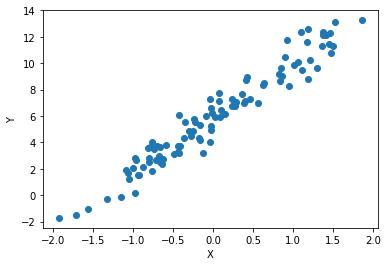

In [4]:
plt.scatter(X,Y)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

### SGD Regressor from scratch

In [5]:
#model output
def Model(w, b, x):
    return w*x + b

In [6]:
#define loss function
def loss_fun(y_pred, y):
    return torch.mean((y_pred - y)**2)

In [7]:
#define training function
def train(w,b,X,Y):
    lr = 0.01
    loss_diff = 1
    loss_old = loss_fun(w*X+b, Y)
    loss_new = 0
    epoch = 0
    #loop untill convergence or max iterations
    while(abs(loss_diff)>0.00001 and epoch<1001):
        #calculate gradients
        g_w = torch.mean(2*(Model(w,b,X) - Y)*X)
        g_b = torch.mean(2*(Model(w,b,X) - Y))
        
        #optimize weights
        w = w - lr*g_w
        b = b - lr*g_b
        
        #calculate loss
        loss_new = loss_fun(Model(w,b,X),Y)
        if(epoch%10==0):
            print('epoch : ',epoch,' loss : ', loss_new.item())
        loss_diff = loss_new - loss_old
        
        loss_old = loss_new
        epoch = epoch+1
        
    return w, b

In [8]:
# Define weight parameters
w = torch.randn(1)
b = torch.randn(1)

#Split data into test and train
X_train, X_test, Y_train, Y_test = X[0:80], X[80:100], Y[0:80], Y[80:100]

#Train on training data
w, b = train(w, b, X_train, Y_train)

epoch :  0  loss :  64.54771423339844
epoch :  10  loss :  43.65538787841797
epoch :  20  loss :  29.640356063842773
epoch :  30  loss :  20.23105812072754
epoch :  40  loss :  13.908276557922363
epoch :  50  loss :  9.65542221069336
epoch :  60  loss :  6.791825771331787
epoch :  70  loss :  4.86145544052124
epoch :  80  loss :  3.5585696697235107
epoch :  90  loss :  2.678025484085083
epoch :  100  loss :  2.082059144973755
epoch :  110  loss :  1.6780788898468018
epoch :  120  loss :  1.4037833213806152
epoch :  130  loss :  1.2172167301177979
epoch :  140  loss :  1.0900814533233643
epoch :  150  loss :  1.003273844718933
epoch :  160  loss :  0.9438788294792175
epoch :  170  loss :  0.9031506776809692
epoch :  180  loss :  0.8751587867736816
epoch :  190  loss :  0.855874240398407
epoch :  200  loss :  0.842556357383728
epoch :  210  loss :  0.8333348035812378
epoch :  220  loss :  0.826933741569519
epoch :  230  loss :  0.8224784135818481
epoch :  240  loss :  0.819368839263916
e

In [9]:
print(w, b)

tensor([4.0967]) tensor([5.8513])


In [10]:
#Test on test data
y_pred = Model(w, b, X_test)
loss_fun(y_pred,Y_test)

tensor(0.5297)

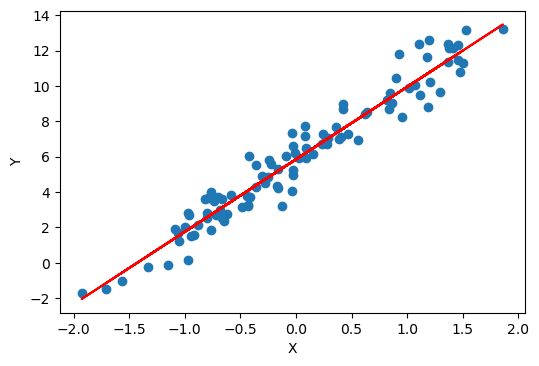

In [11]:
plt.figure(dpi=100)
plt.scatter(X,Y)
plt.plot(X,w*X+b, 'r')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

### Pytorch Autograd

Pytorch offers a very convenient way to compute gradient of any function with respect to all it's components. We just need to set requires_grad to True while creating initial tensors. after that, if we want to calculate gradient of any saclar with respect to all variables it depends, we jut need to calculate backward() on that variable.

In [12]:
#Create tensors and perform operations
t1 = torch.randn(1, requires_grad=True)
t2 = torch.randn(1, requires_grad=True)

y1 = 4*t1 + t2
y2 = 10

l = (y1 - y2)**2

#call backward on l
l.backward()

print('dl/dt1', t1.grad)
print('dl/dt1', t2.grad)

dl/dt1 tensor([-74.3108])
dl/dt1 tensor([-18.5777])


When we are computing gradients, we need to cache input values, and intermediate features as they maybe required to compute the gradient later.

The gradient of  b=w1∗a
w.r.t it's inputs w1 and a is a and w1

respectively. We need to store these values for gradient computation during the backward pass. This affects the memory footprint of the network.

While, we are performing inference, we don't compute gradients, and thus, don't need to store these values. Infact, no graph needs to be create during inference as it will lead to useless consumption of memory.

PyTorch offers a context manager, called torch.no_grad for this purpose. 

Let us now build regression model again by using autograd instead of manually calculating gradients

In [13]:
#model output
def Model(w, b, x):
    return w*x + b

In [14]:
#define loss function by using MSELoss function in torch.nn
loss_fun = nn.MSELoss()

In [15]:
#define training function
def train(w,b,X,Y):
    lr = 0.01
    loss_diff = 1
    loss = loss_fun(w*X+b, Y)
    loss_new = 0
    loss_old = loss
    epoch = 0
    #loop untill convergence or max iterations
    while(abs(loss_diff)>0.00001 and epoch<1001):
        
        if w.grad is not None:
            w.grad.zero_()
        
        if b.grad is not None:
            b.grad.zero_()
            
        #calculate gradients
        loss = loss_fun(w*X+b, Y)
        loss.backward()
        
        #optimize weights
        with torch.no_grad():
            w -= lr*w.grad
            b -= lr*b.grad
            
        #calculate loss
        loss_new = loss_fun(Model(w,b,X),Y)
        if(epoch%10==0):
            print('epoch : ',epoch,' loss : ', loss_new.item())
        loss_diff = loss_new - loss_old
        
        loss_old = loss_new
        epoch = epoch+1
        
    return w, b

In [16]:
# Define weight parameters
w = torch.randn(1, requires_grad=True)
b = torch.randn(1, requires_grad=True)

#Split data into test and train
X_train, X_test, Y_train, Y_test = X[0:80], X[80:100], Y[0:80], Y[80:100]

#Train on training data
w, b = train(w, b, X_train, Y_train)

epoch :  0  loss :  54.695709228515625
epoch :  10  loss :  37.02635192871094
epoch :  20  loss :  25.175073623657227
epoch :  30  loss :  17.21973991394043
epoch :  40  loss :  11.87490463256836
epoch :  50  loss :  8.280515670776367
epoch :  60  loss :  5.860785484313965
epoch :  70  loss :  4.229992866516113
epoch :  80  loss :  3.129568099975586
epoch :  90  loss :  2.386045455932617
epoch :  100  loss :  1.8829576969146729
epoch :  110  loss :  1.5420383214950562
epoch :  120  loss :  1.310633897781372
epoch :  130  loss :  1.1532927751541138
epoch :  140  loss :  1.0461113452911377
epoch :  150  loss :  0.9729569554328918
epoch :  160  loss :  0.9229226112365723
epoch :  170  loss :  0.8886280059814453
epoch :  180  loss :  0.8650684356689453
epoch :  190  loss :  0.8488450050354004
epoch :  200  loss :  0.8376458287239075
epoch :  210  loss :  0.8298953771591187
epoch :  220  loss :  0.8245177268981934
epoch :  230  loss :  0.820776641368866
epoch :  240  loss :  0.8181670308113

In [17]:
print(w.item(), b.item())

4.0966796875 5.851017475128174


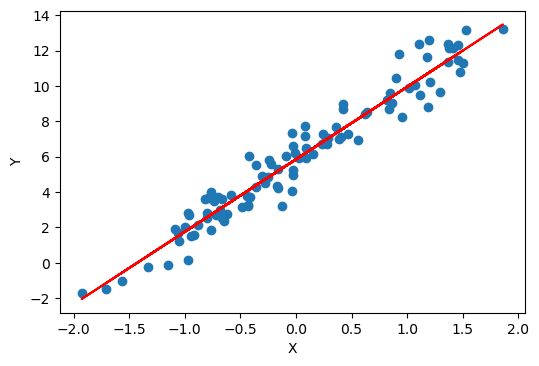

In [18]:
plt.figure(dpi=100)
plt.scatter(X,Y)
plt.plot(X,(w*X+b).detach(), 'r')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

###  Pytorch Optim

Pytorch offers a wide range of optimizers in it's torch.optim library. We just need to perform step function on optimizer and it automatically updates values of parameters. Hare is the list of optimizers in pytorch.

In [19]:
dir(optim)

['ASGD',
 'Adadelta',
 'Adagrad',
 'Adam',
 'AdamW',
 'Adamax',
 'LBFGS',
 'Optimizer',
 'RMSprop',
 'Rprop',
 'SGD',
 'SparseAdam',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'lr_scheduler']

### SGD using Pytorch Autograd and Optim

Let's now look perform the same task using optim

In [20]:
#model output
def Model(w, b, x):
    return w*x + b

In [21]:
#define loss function by using MSELoss function in torch.nn
loss_fun = nn.MSELoss()

In [26]:
#define training function
def train(w,b,X,Y):
    loss_diff = 1
    loss = loss_fun(w*X+b, Y)
    loss_new = 0
    loss_old = loss
    
    #define optimizer
    optimizer = optim.SGD([w, b], lr = 0.01)
    
    epoch = 0
    #loop untill convergence or max iterations
    while(abs(loss_diff)>0.00001 and epoch<1001):
            
        #calculate gradients
        loss = loss_fun(w*X+b, Y)
        optimizer.zero_grad()
        loss.backward()
        
        
        #optimize weights
        optimizer.step()
            
        #calculate loss
        loss_new = loss_fun(Model(w,b,X),Y)
        if(epoch%10==0):
            print('epoch : ',epoch,' loss : ', loss_new.item())
        loss_diff = loss_new - loss_old
        
        loss_old = loss_new
        epoch = epoch+1
        
    return w, b

In [27]:
# Define weight parameters
w = torch.randn(1, requires_grad=True)
b = torch.randn(1, requires_grad=True)

#Split data into test and train
X_train, X_test, Y_train, Y_test = X[0:80], X[80:100], Y[0:80], Y[80:100]

#Train on training data
w, b = train(w, b, X_train, Y_train)

epoch :  0  loss :  32.13935089111328
epoch :  10  loss :  22.134859085083008
epoch :  20  loss :  15.353073120117188
epoch :  30  loss :  10.74827766418457
epoch :  40  loss :  7.616140842437744
epoch :  50  loss :  5.481707572937012
epoch :  60  loss :  4.024286270141602
epoch :  70  loss :  3.0270636081695557
epoch :  80  loss :  2.3432297706604004
epoch :  90  loss :  1.873225212097168
epoch :  100  loss :  1.5494163036346436
epoch :  110  loss :  1.3257777690887451
epoch :  120  loss :  1.1709281206130981
epoch :  130  loss :  1.0634305477142334
epoch :  140  loss :  0.9886058568954468
epoch :  150  loss :  0.9363828897476196
epoch :  160  loss :  0.8998357653617859
epoch :  170  loss :  0.8741884231567383
epoch :  180  loss :  0.8561414480209351
epoch :  190  loss :  0.8434081077575684
epoch :  200  loss :  0.8343998789787292
epoch :  210  loss :  0.8280102610588074
epoch :  220  loss :  0.8234663009643555
epoch :  230  loss :  0.820226788520813
epoch :  240  loss :  0.8179119229

In [28]:
print(w.item(), b.item())

4.095165729522705 5.853992462158203


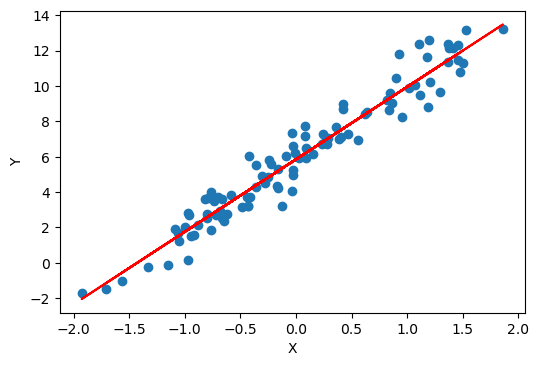

In [29]:
plt.figure(dpi=100)
plt.scatter(X,Y)
plt.plot(X,(w*X+b).detach(), 'r')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()